# Abstrakte Datentypen (ADT)

## Effizienz-beeinflussende Faktoren

• **Wahl passender abstrakter Datentypen (ADT)**, z.B. Stapel, Liste, Feld, Hashtable, Warteschlange, Graph, Heap usw.

• **Entwurf effizienter Algorithmen**, die diese ADT (und die zugehörigen Operationen) verwenden, z.B. Such- und
Sortierverfahren, Algorithmen auf Graphen usw. (z.B. HORNER-Schema, Schnelle Matrixmultiplikation)

• **Geschickte Implementierung** dieser Algorithmen

• Effiziente Implementierung der ADT durch **geeignete Wahl konkreter Datenstrukturen**, z.B. ADT Stapel mit einfach/mehrfach verketteten Listen oder mit Feldern implementieren (evtl. bereits in PS enthalten)

Ein **Abstrakter Datentyp (ADT)** ist ein theoretisches Konzept, mit dem ein Datentyp unabhängig von dessen Implementation, z.B. mittels konkreter Datentypen einer bestimmten Programmiersprache, definiert wird. Zur formalen Spezifikation gehören eine Signatur $\Sigma$ (Syntax) und eine Menge von Axiomen $\Phi$ (Semantik). 

__Definition:__ Die Signatur $\Sigma$ eines ADT ist ein Paar $\Sigma = (S, \Omega)$.

- $S$ ist die Menge aller Wertemengen (Sorten), die in den Operationen vorkommen dürfen.
- $\Omega$ enthält die Schnittstellenbeschreibungen aller Operationen (Funktionen), die der ADT kennt und nach außen (Schnittstelle) anbietet.

In $\Omega$ werden die (bedeutungslosen) Namen verwendet, um die Wertemengen der Parameter und die der Ergebnisse der Operationen zu beschrieben. Die Division von natürlichen Zahlen kann z.B. folgendermaßen dargestellt werden: $\text{div}: \mathbb{N} \div \mathbb{N} \to \mathbb{Q}^+$, wobei die verwendeten Sortennamen zunächst ohne Bedeutung sind. (Zur grafischen Darstellung kann man "Trichterbilder" verwenden: Im Beispiel $\text{div}$ gibt es zwei Eingabe- und einen Ausgabetrichter.)

Die Signatur $\Sigma$ eines ADT stellt dabei eine *abstrakte Algebra* dar. Das Konzept ist analog zu algebraischen Strukturen aus der (mathematischen) Algebra, wie Gruppen, Ringe oder Körper. 

__Definition:__ Die Axiome $\Phi$ eines ADT sind eine Menge von Gleichungen, die die Operationen in ihrer Wirkung
beschreiben. Dabei handelt es sich um deskriptive Spezifikationen.

Durch die Axiome wird die Semantik der Operationen beschrieben. Ein ADT beschreibt demzufolge WAS die Operationen bewirken aber nicht WIE sie es umsetzen.

Durch die Wahl konkreter Datentypen (einer Programmiersprache) und implementierter Operationen (Funktionen; Prozeduren) mit Daten der gewählten Typen entsteht aus dem abstrakten ein konkreter Datentyp. Die Axiome wirken wie ein "Pflichtenheft" für ADT-Implementierer: Die gewählte Implementation muss den Axiomen vollständig gehorchen.

Die getroffene Wahl des konkreten Datentyps wirkt sich natürlich auf die Effizienz des betreffenden Programms aus.

## Beispiele

### Boolean

Die Menge der Booleans umfasst genau zwei Elemente, nämlich $\text{true}$ und $\text{false}$. Darüber hinaus werden in dieser Algebra die Operationen Negation $\neg$, Konjunktion $\land$ und Disjunktion $\lor$ definiert. Die Signaturen lassen erkennen, dass es drei einstellige und zwei zweistellige Operationen gibt.

$$
\begin{align*}
S = \{ &\text{Boolean} \} \\
\Omega = \{ &\text{true}: \to \text{Boolean}, \\
    &\text{false}: \to \text{Boolean} \\
    &\neg : \text{Boolean} \to \text{Boolean} \\
    &\land : \text{Boolean} \times \text{Boolean} \to \text{Boolean} \\
    &\lor : \text{Boolean} \times \text{Boolean} \to \text{Boolean}  \} \\
\Phi = \{ &\text{false} \land x = \text{false} \\
    &x \land \text{false} = \text{false} \\
    &\text{true} \land \text{true} = \text{true} \\
    &\text{true} \land x = x \\
    &x \land \text{true} = x \\
    &\text{true} \lor x = \text{true} \\
    &x \lor \text{true} = \text{true} \\
    &\text{false} \lor \text{false} = \text{false} \\
    &\text{false} \lor x = x \\
    &x \lor \text{false} = x \\
    &\neg \text{false} = \text{true} \\
    &\neg \text{true} = \text{false} \} \\
\end{align*}
$$

### Stack

Wir beginnen mit einer informellen Beschreibung. Die beiden charakteristischen Operationen eines Stacks (Stapels) sind:

- __push__, welche ein Element zum Stack hinzufügt, und
- __pop__, welches das oberste Element (den *top of stack*) entfernt.

Dabei werden die Elemente aufeinander gestapelt. Bei der __pop__-Operation wird das zuletzt hinzugefügte Element wieder entfernt. Aufgrund dieser Reihenfolge ergibt sich der Begriff __LIFO__ (last in, first out), welcher im Zusammenhang mit Stacks verwendet wird.

In der folgenden Definition finden sich noch weitere Operationen.

<br/>
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b4/Lifo_stack.png" width="350"/>
<br/>

$$
\begin{align*}
S = \{ & \text{Stack}, \text{Element} \} \\
\Omega = \{ &\text{create}: \to \text{Stack} \\
    &\text{push}: \text{Stack} \times \text{Element} \to \text{Stack} \\
    &\text{pop}: \text{Stack} \setminus \{ \epsilon \} \to \text{Stack} \\
    &\text{top}: \text{Stack} \setminus \{ \epsilon \} \to \text{Element} \\
    &\text{empty}: \text{Stack} \to \{ \text{true},\text{false}\} \} \\
\Phi = \{ &\text{create}() = \epsilon \\
    &\text{empty}(\epsilon) = \text{true} \\
    &\text{empty}(\text{Stack} \setminus \{ \epsilon \}) = \text{false} \\
    &\text{top}(\text{push}(\text{Stack}, \text{Element})) = \text{Element} \\
    &\text{pop}(\text{push}(\text{Stack}, \text{Element})) = \text{Stack} \} \\
\end{align*}
$$


# Konkrete Datenstrukturen (konkrete Datentypen)

Konkrete Datenstrukturen sind Implementierungen eines ADT. Zur Implementierung ein und desselben ADT kann es unterschiedliche konkrete Datentypen geben. Gleiche Operationen können für verschiedene konkrete Datenstrukturen sehr unterschiedliche Laufzeiten haben.

## Array

Ein Array (Feld) ist eine in den meisten Programmiersprachen anzutreffene Datenstruktur. Dabei handelt es sich um eine Sammlung von Elementen (beliebiger Typen), welche über Index identifiziert werden. 

Die einfachste Form eines Arrays ist ein ein-dimensionales Array. Bei einem ein-dimensionalen Array werden alle Elemente (wenigstens konzeptionell) direkt nacheinander im Arbeitsspeicher abgelegt. Durch diese Festlegung ist es möglich, anhand des Index und der Basisadresse des Arrays (der Adresse des 0. Elements) direkt auf die Speicheradresse des Elements mit entsprechendem Index zuzugreifen.

Bei höher-dimensionalen Arrays spricht man auch von Matrizen. Hier bedarf es spezieller Funktionen, die von einem $n$-Tupel, das den Index angibt (bsp. (1, 2)), auf eine Speicheradresse abbildet. Eine mögliche Implementation für ein 2-dimensionales Array besteht darin, jede Reihe der Matrix hintereinander abzuspeichern und anhand der Länge jeder Reihe auf den entsprechenden 2-dimensionalen Index zugreifen zu können.

Es ist zu beachten, dass die Länge eines Arrays, im Gegensatz zu Listen, nicht variabel ist, da ein Array nicht über den für ihn zugewiesenen Speicherraum im Arbeitsspeicher hinausgehen darf.

![Array](https://docs.oracle.com/javase/tutorial/figures/java/objects-tenElementArray.gif) 
<div style="text-align: right; font-size: 10px;">(Quelle: Oracle)</div>

### Komplexitätsbetrachtung

#### Lesen

Da jeder Index einer festen Speicheradresse zugeordnet wird, kann in konstanter Zeit $\mathcal{O}(1)$ über Index auf ein bestimmtes Element zugegriffen werden.

#### Schreiben

Zum Schreiben muss zunächst die Speicheradresse gefunden werden. Dies geschieht in konstanter Zeit. Anschließend muss der entsprechende Wert der Arbeitsspeicheradresse geändert werden. Hierfür ergibt sich ebenfalls eine Gesamtlaufzeit von $\mathcal{O}(1)$. 

#### Suche eines Elements (Binäre Suche) 

Die Suche eines bestimmten Elements in einem Array entspricht der Frage nach dem Index, unter dem das Element im Feld gespeichert ist. Ein sehr schnelles Verfahren zur Bestimmung dieses Indexes ist die binäre Suche. Sie setzt voraus, dass die Feldelemente (nach einer ausgewählten totalen Ordnungsrelation aufsteigend) sortiert sind. Dann geht man folgendermaßen vor. 

Man vergleicht das gesuchte Element mit dem Element an mittlerer Feldposition. Stimmt es mit diesem Element überein, hat man den gesuchten Index gefunden und ist fertig. Ist das gesuchte Element kleiner als das in Mittelposition, geht die Suche im linken Elementfeld weiter, anderenfalls im rechten. Dies erinnert an die Art und Weise der Suche eines Eintrags in einem Lexikon (als Print-Medium).

Nach dieser Beschreibung erhält man eine rekursive Funktion wie folgt. 

In [112]:
import numpy as np
import math

def binary_search(arr, value, lo=None, hi=None):
    if not lo:               
        lo = 0               
    if not hi:
        hi = len(arr)        
    if lo >= hi:             
        return None          
    mid = math.floor((lo + hi) / 2) 
    if value == arr[mid]:   
        return mid
    if value < arr[mid]:     
        return binary_search(arr, value, lo, mid)
    return binary_search(arr, value, mid+1, hi)  
                                                
print(binary_search(np.array([1, 4, 6, 7, 9, 13, 15, 16, 18, 20, 21]), 16))

7


Es handelt sich um eine sehr effiziente Prozedur mit einem zeitlichen Aufwand in 

$$
\mathcal{O}(\log_2n).
$$

Dies ergibt sich aus dem fortgesetzten Halbieren des jeweiligen Feldes. Bei $n$ Elementen gibt es höchstens $\log_2n$ Halbierungen, bis das gesuchte Element - falls vorhanden - gefunden ist. Diesen Suchprozess illustriert ein Binärbaum der Tiefe $\log_2n$.

Zu beachten ist, dass der Aufwand zur Sortierung der Feldelemente hinzu gerechnet werden muss. Dieser ist allerdings nur genau einmal vor Anwendung des beschriebenen Suchverfahrens durchzuführen. Nachdem das Array sortiert vorliegt, kann jedes Elemenent ohne Neusortierung gesucht werden.

## Selection Sort

Selection Sort ist einer der einfachsten Algorithmen zum Sortieren von **Arrays**. Man sucht zunächst nach dem kleinsten Element des Arrays und platziert es an den Anfang, d.h. an Position $0$. Danach sucht man das kleinste Element des Arrays ab einschl. Position $1$ und platziert es auf Position $1$. Dieser Vorgang wird für alle $n$ Positionen ausgeführt, wenn das Array $n$ Elemente enthält. Das Verfahren wird oftmals von Skatspielern bei der Kartenaufnahme angewandt. Da es sich um ein In-place-Verfahren handelt, das keinen Zusatzspeicher benötigt, wird das jeweils ggf. gefundene kleinere Element mit dem Vergleichselement an der betrachteten Position vertauscht. 

### Komplexitätsbetrachtung

Für jedes der $n$ Feldelemente finden $n-1$ Vergleiche und höchstens ebensoviele Positionswechsel (Umspeicherungen) statt. Wenn wir für einen solchen Vergleich mit evtl. Umspeicherung einen konstanten Aufwand von $1$ ansetzen, ergibt sich folgender Gesamtaufwand:

$$T(n) = (n-1)+(n-2)+(n-3)+\ldots + 2 + 1 = \frac{n\cdot(n-1)}{2} \in \mathcal{O} \left(n^2 \right)$$
<!-- <div style="text-align: right; font-size: 24px;">&#9633;</div>  -->

Damit liegt der Zeitaufwand von Selection Sort in $\mathcal{O}(n^2)$.
Da dieser Algorithmus als In-place Algorithmus ausgeführt werden kann, wird kein zusätzlicher Speicher benötigt und der Speicheraufwand liegt in $\mathcal{O}(1)$.

In [113]:
def selection_sort(arr):
    for i in range(0, len(arr)):
        _min = arr[i]         #temporary variable to store the mininum found so far
        index = i             
        for j in range(i+1, len(arr)):
            if arr[j] < _min:   
                _min = arr[j]
                index = j
        arr[i], arr[index] = arr[index], arr[i]  #put i-th lowest number at index i, i.e. swap at index i and index of lowest
    return arr                                   #element, since order of the so far unsorted subarray doesn't matter

print(selection_sort(np.asarray([5, 1, 8, 2, 7, 3, 4])))
    

[1 2 3 4 5 7 8]


## Bubble Sort

Bei diesem Sortierverfahren wird das **Array** mehrmals durchlaufen. Alle $n-1$ Paare nebeneinander stehender Elemente werden miteinander verglichen. Ist es in falscher Reihenfolge, d.h. es steht ein größerer Wert vor einem kleineren, so tauschen die beiden Elemente ihre Positionen. Damit das komplette Array sortiert wird, muss es so oft durchlaufen werden, bis keine Umspeicherungen mehr nötig sind. Im best case ist lediglich genau ein ($1$) Durchlauf erforderlich und im worst case sind es $n$.

![Bubble Sort](https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Bubblesort-edited-color.svg/288px-Bubblesort-edited-color.svg.png)

### Komplexitätsbetrachtung

$T(n)$ bezeichnet den Zeitaufwand zur Bubble-Sort-Sortierung eines Feldes mit $n$ Elementen im worst case.

$$T(n) = n\cdot (n-1) \in \mathcal{O} \left(n^2 \right)$$
<!-- <div style="text-align: right; font-size: 24px;">&#9633;</div> -->

Damit liegt der Zeitaufwand von Bubble Sort in $\mathcal{O}(n^2)$. Da es sich wieder um ein In-place-Verfahren handelt, wird kein zusätzlicher Speicher benötigt sodass der Speicheraufwand in $\mathcal{O}(1)$ liegt.

Das folgende Programm verwendet stets $n$ Durchläufe und berücksichtigt nicht, ob sie wirklich benötigt werden. Das kann man verbessern! 

In [114]:
def bubble_sort(arr):
    for i in reversed(range(0, len(arr))):
        for j in range(0, i):                  
            if arr[j] > arr[j+1]:              
                arr[j], arr[j+1] = arr[j+1], arr[j]  #swap the elements, if they are in wrong order
    return arr

print(bubble_sort(np.asarray([5, 1, 8, 2, 7, 3, 4])))

[1 2 3 4 5 7 8]


## Linked List

Im Gegensatz zu Arrays sind Listen dynamische Datenstrukturen. Die Länge einer Liste steht nach Instanziierung nicht für immer fest. Durch Hinzufügen weiterer Elemente kann die Länge einer Liste bedarfsgerecht angepasst werden. 

Eine __Linked List__ (verkettete Liste) ist eine Implementation für den ADT "Lineare Liste". 
Linked Lists müssen die folgenden Operationen implementieren:

* Einfügen eines Elements $x$ in die Liste $L$ - an der Position $p$,
* Entfernen eines Elements $x$ aus der Liste $L$,
* Suchen eines Elements $x$ in der Liste $L$ und
* Zugriff auf das Element $x$ in der Liste $L$

Zur Implementation linearer Listen kommen *sequentielle Speicherung* (Array) und die *verkettete Speicherung* infrage. 
Für letztere Speicherform betrachten wir zwei Implementationen, nämlich __Singly Linked List__ (einfach verkettete Liste) und __Doubly Linked List__ (doppelt verkettete Liste), und illustrieren an diesem Beispiel nochmals den Trade-off zwischen Speicher und Zeit.


### Singly Linked List

Bei einer __Singly Linked List__ werden die Elemente (eines bestimmten Grundtyps) der Liste als Nodes (Knoten) abgebildet. Ein Node besteht dabei aus zwei Werten: dem eigentlichen Wert des Elements und einem Pointer, der auf das nächste Element der Liste zeigt. Der Pointer des letzten Elements der Liste hat den Wert __null__. Um auf die Liste zuzugreifen, wird die (gespeicherte!) Adresse des ersten Nodes angegeben. Da die Verweise auf das jeweils nächste Element gegeben sind, kann man durch Iteration der Pointer, die entsprechenden Elemente der Liste erreichen. Man kann sich das wie ein "Durchhangeln" vorstellen.

Die Liste [5, 10, 20, 1] wird folgendermaßen dargestellt:

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTH3eRv3Nvh9u12T_Qnx_QWjxG-Nj5MpQSX-AjaWMiayEaN6gI6" alt="Drawing" style="width: 400px;"/>

In [115]:
class Node:
    def __init__(self):
        self.value = None
        self.next = None

    def add(self, value, index):
        if index > 1 and self.next is not None:
            return self.next.add(value, index - 1)
        elif index == 1:
            new_node = Node()
            new_node.value = value
            new_node.next = self.next
            self.next = new_node
            return True
        return False


class SinglyLinkedList:
    def __init__(self):
        self.head = Node()
        self.length = 0

    def add(self, value, index=None):
        if index is None:
            index = self.length
        if index == 0:
            new_node = Node()
            new_node.value = value
            new_node.next = self.head
            self.head = new_node
            self.length += 1
        elif 0 < index <= self.length:
            if self.head.add(value, index):
                self.length += 1

    def print_lst(self):
        node = self.head
        for i in range(self.length - 1):
            print('{0}, '.format(node.value), end='')
            node = node.next
        print(node.value)

        
lst = SinglyLinkedList()
lst.add(5)
lst.add(10)
lst.add(20)
lst.add(1)
lst.add(-1, 2)

lst.print_lst()

5, 10, -1, 20, 1


#### Access (Zugriff)

Da man zunächst nur auf den Anfang der Liste zugreifen kann, muss man über die Pointer auf die jeweils nächsten Elemente durch die gesamte Liste iterieren, um das letzte Element der Liste zu erreichen. Der Aufwand zum Zugriff auf ein Element beträgt also $\mathcal{O}(n)$.

#### Insert (Einfügen)

Nach dem $m$-ten Element einer Liste soll ein neues Element eingefügt werden. Die Einfügeposition ist durch einen Zeiger auf das $m$-te Element vorgegeben (wird also nicht gesucht). Als erstes wird an einer beliebigen Stelle im Speicher ein neues Node angelegt. Danach muss der Pointer des $m$-ten Elements, der auf das nächste, also $m+1$-te, Element zeigt, in das neu erstellte Node geschrieben werden. Schließlich soll das bisherige $m+1$-te Element Nachfolger des einzufügenden Elements sein. Im letzten Schritt muss der Pointer des $m$-ten Elements so umgeschrieben werden, dass er auf das neu erstellte Node zeigt.

<img width="450" src="https://www.geeksforgeeks.org/wp-content/uploads/gq/2013/03/Linkedlist_insert_middle.png"/>

Für den Sonderfall, dass an erster Stelle, also am Index 0, das Element eingefügt werden soll, muss der Pointer des neuen Nodes auf das bisher erste Element zeigen. Zusätzlich wird der Pointer auf den Head der Linked List entsprechend bearbeitet.

<img width="450" src="https://www.geeksforgeeks.org/wp-content/uploads/gq/2013/03/Linkedlist_insert_at_start.png"/>

In beiden Fällen wird eine konstante Anzahl an Operationen durchgeführt, somit beträgt der Aufwand zum Einfügen $\mathcal{O}(1)$.

#### Delete (Entfernen)

Um das $m$-te Element der Liste zu löschen, muss lediglich der Pointer des $m-1$-ten Nodes so modifiziert werden, dass er auf das $m+1$-te Element zeigt. Auch hier wird lediglich eine konstante Anzahl an Operationen benötigt, was zu einem Aufwand von $\mathcal{O}(1)$ führt.

<img width="450" src="https://www.geeksforgeeks.org/wp-content/uploads/gq/2014/05/Linkedlist_deletion.png"/>

Für den Fall, dass das Element am Index 0 entfernt werden soll, muss der Pointer, der auf den Head der Linked List zeigt, auf das Node mit Index 1 zeigen.

### Doubly Linked List

Eine Doubly Linked List ist wie eine Singly Linked List implementiert, mit dem Unterschied, dass es bei einer Doubly Linked List zusätzlich zum Pointer auf das nächste Element, einen Pointer, der auf das vorherige Element zeigt, gibt.

<img width="500" src="https://www.geeksforgeeks.org/wp-content/uploads/gq/2014/03/DLL1.png"/>

Der *prev*-Pointer des ersten Elements zeigt, wie der *next*-Pointer des letzten Elements, auf __null__. Die asymptotischen Zeitaufwände der Access-, Insert- und Delete-Operationen verhalten sich genauso, wie bei der Singly Linked List. Jedoch hat man bei dem Anwendungsfall, bei dem man das Node am Index $i$ hat und auf den Index $i-1$ zugreifen möchte, den Vorteil, dass man dies in $\mathcal{O}(1)$ tun kann, da man durch den *prev*-Pointer die Adresse am Index $i-1$ bereits hat. Bei einer Singly Linked List müsste man am Anfang der Liste anfangen und hätte einen Aufwand von $\mathcal{O}(n)$. Zu erwähnen ist, dass der asymptotische Speicherbedarf zwar auch $\mathcal{O}(n)$ ist, jedoch das 1.5-fache an Speicher im Vergleich zur Singly Linked List benötigt wird, da durch die zwei Pointer pro Node drei anstatt zwei Speicherplätze beansprucht werden. Hier gilt also das Prinzip "trade space for time".

In [116]:
class DoublyNode:
    def __init__(self):
        self.value = None
        self.next = None
        self.prev = None  # prev Pointer is required in Doubly Linked List

    def add(self, value, index):  # using prev node as parameter to be able to set prev pointer
        if index > 1 and self.next is not None:
            return self.next.add(value, index - 1)
        elif index == 1:
            new_node = DoublyNode()
            new_node.value = value
            new_node.next = self.next
            new_node.prev = self
            self.next.prev = new_node
            self.next = new_node
            return True
        return False

    def add_from_tail(self, value, index):
        if index > 1 and self.prev is not None:
            return self.prev.add_from_tail(value, index - 1)
        elif index == 1:
            new_node = DoublyNode()
            new_node.value = value
            new_node.next = self
            new_node.prev = self.prev
            self.prev.next = new_node
            self.prev = new_node
            return True
        return False

    def remove(self, index):
        if index > 0 and self.next is not None:
            return self.next.remove(index - 1)
        elif index == 0:
            self.prev.next = self.next
            self.next.prev = self.prev
            return True
        return False

    def remove_from_tail(self, index):
        if index > 0 and self.prev is not None:
            return self.prev.remove_from_tail(index - 1)
        elif index == 0:
            self.next.prev = self.prev
            self.prev.next = self.next
            return True
        return False


class DoublyLinkedList:
    def __init__(self):
        node = DoublyNode()
        self.head = node
        self.tail = node  # tail pointer exist to access from end of list
        self.length = 0

    def add(self, value, index=None):
        if index is None:
            index = self.length
        if index == 0 and self.length == 0:
            self.head.value = value
            self.length += 1
        elif index == 0:
            new_node = DoublyNode()
            new_node.value = value
            new_node.next = self.head
            new_node.prev = None
            self.head.prev = new_node
            self.head = new_node
            self.length += 1
        elif 0 < index < self.length:
            if self.head.add(value, index):
                self.length += 1
        elif index == self.length:
            self.add_from_tail(value, 0)

    def add_from_tail(self, value, index):
        if index == 0 and self.length == 0:
            self.tail.value = value
            self.length += 1
        elif index == 0:
            new_node = DoublyNode()
            new_node.value = value
            new_node.next = None
            new_node.prev = self.tail
            self.tail.next = new_node
            self.tail = new_node
            self.length += 1
        elif 0 < index < self.length:
            if self.tail.add_from_tail(value, index):
                self.length += 1
        elif index == self.length:
            self.add(value, 0)

    def remove(self, index):
        if index >= self.length:
            return None
        if index == 0 and self.length == 1:
            self.head.value = None
            self.length -= 1
        elif index == 0:
            self.head.next.prev = None
            self.head = self.head.next
            self.length -= 1
        elif 0 < index < self.length - 1:
            if self.head.remove(index):
                self.length -= 1
        elif index == self.length - 1:
            self.remove_from_tail(0)

    def remove_from_tail(self, index):
        if index >= self.length:
            return None
        if index == 0 and self.length == 1:
            self.tail.value = None
            self.length -= 1
        elif index == 0:
            self.tail.prev.next = None
            self.tail = self.tail.prev
            self.length -= 1
        elif 0 < index < self.length - 1:
            if self.tail.remove_from_tail(index):
                self.length -= 1
        elif index == self.length - 1:
            self.remove(0)

    def print_lst(self):
        node = self.head
        for i in range(self.length - 1):
            print('{0}, '.format(node.value), end='')
            node = node.next
        print(node.value)


lst = DoublyLinkedList()
lst.add(5)
lst.add(10)
lst.add(20)
lst.add(1)
lst.add(-1, 2)
lst.add_from_tail(-2, 4)
lst.remove(2)

lst.print_lst()

5, -2, -1, 20, 1


### Fazit

Eine Linked List eignet sich, wenn häufig Elemente eingefügt und entfernt werden, da der Zeitaufwand dafür lediglich $\mathcal{O}(1)$ beträgt. Eine Doubly Linked List lohnt sich, wenn man häufig das Vorgängerelement benötigt. Dies ist z. B. bei Browserverläufen oder Undo/Redo-Aktionen der Fall. Hier kommt eine Doubly Linked List zum Einsatz.

## Dynamisches Array

Dynamische Arrays bieten sowohl den Vorteil von Arrays, nämlich dass der Aufwand zum Zugriff $\mathcal{O}(1)$ beträgt als auch den Vorteil von Linked Lists, dass die Länge der Liste variabel ist. Diese Datenstruktur wird beispielsweise in Java unter dem Namen *ArrayList* implementiert.

Wird ein dynamisches Array initialisiert, so wird zunächst ein Array mit einer gewissen Länge angelegt. Man kann beispielsweise mit der Größe $1$ anfangen. Möchte man nun ein Element in das anfangs leere dynamische Array einfügen, so ist hierfür Platz. Aber danach ist das Array voll. Soll nun ein weiteres Element eingefügt werden, wird im Speicher ein neues Array eingerichtet. Die Elemente des "potenziell überfüllten" Arrays werden in das neue umgespeichert. Fügt man weitere Elemente an, so ist irgendwann auch das neue Array voll, so dass wiederum ein neues Array im Speicher angelegt wird usw. Jedes neue Array hat die doppelte Länge des vorherigen. Dieser Vorgang kann beliebig oft wiederholt werden.

Nun stellt sich die Frage, ob man auch beim Entfernen von Elementen die Länge durch Verwendung eines neuen Arrays abpassen sollte. Alternativ könnte man einfach das vorhandene Array weiterhin nutzen, der Platz ist ja ausreichend. Dies hätte allerdings zur Folge, dass man unnötig viel Platz im Speicher verbrauchen würde. Hat man beispielsweise sehr viele Elemente eingefügt und danach wieder die meisten entfernt, so sind nur noch sehr wenig Elemente im Array. Jedoch hat das Array dann im Speicher noch die volle Größe, die es jedoch nicht braucht.

Vorschlag: Immer wenn weniger als die Hälfte des Speicherplatzes des Arrays tatsächlich genutzt wird, geht man eine "Ausbaustufe" zurück und legt ein neues Array mit halber Länge an. Dies würde jedoch zu dem Problem führen, dass wenn man sich gerade an so einem Schwellenwert, also am Index $1, 2, 4, 8, 16, ... = 2^i$, befindet und im Wechsel Elemente hinzufügt und entfernt, ständig ein neues Array, mal mit doppelter und dann wieder mit ursprünglicher Länge, erstellt. Dies ist offensichtlich sehr ungünstig.

Besser ist es deshalb, noch eine weitere "Ausbaustufe" zurückzugehen und erst dann ein neues Array halber Länge anzulegen, wenn nur noch weniger als ein Viertel des Arrays genutzt wird. Dies führt dazu, dass man nach einer Verdopplungsoperation, auch bei folgenden Delete-Operationen, weit genug von einer erneuten Speicherallokation entfernt ist. Genau genommen ist man mindestens $\frac{m}{4}$ Operationen von der nächsten Operation mit Speicherallokation entfernt, wenn $m$ die Länge des alloziierten Arrays ist.

<img src="img/dynamic_array.png" width="600">

### Komplexitätsanalyse

#### Access

Da es sich intern um Arrays handelt, kann man per Index auf das entsprechende Element zugreifen. Also beträgt der Aufwand je Zugriff $\mathcal{O}(1)$.

#### Insert 

Da bei einer Insert-Operation mit Speicherallokation das komplette Array kopiert werden muss, beträgt die Komplexität im worst case $\mathcal{O}(n)$. Jedoch kann man mit Mitteln der <a href="04%20-%20Amortisierte%20Analyse.ipynb">amortisierten Analyse</a> feststellen, dass man den Aufwand mit $\mathcal{O}(1)$ angeben kann, womit eine Insert-Operation in einem dynamischen Array im Wesentlichen nicht teurer ist als bei einer Linked List.

#### Delete

Hier verhält es sich ähnlich wie bei der Insert-Operation, im worst case ist der Aufwand $\mathcal{O}(n)$, jedoch kann man amortisiert $\mathcal{O}(1)$ angeben.

## Stack
Weiter oben haben wir den Stack (Stapel) als ADT charakterisiert. Hier sollen nun verschiedene konkrete Datenstrukturen zur Implementation dieses ADT vorgenommen werden.







In [117]:
##  Implementation mit Python-Liste
#   (veränderlich, unbeschränkt, Zugriff über Index und am Ende)

#   Variante 1: append()/push(i) und pop(i): beide in O(1)

class Stack1:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        tos = self.items[len(self.items)-1]
        self.items.pop()
        return tos

    def size(self):
        return len(self.items)

In [118]:
#   Variante 2: insert(i)/push(i) und pop(i): beide in O(n), wobei n = Stack-size
#      ineffizienter als Variante 1

class Stack2:

    def __init__(self):
        self.items = []
        self.topIndex = 0
        self.maxIndex = 400000

    def isEmpty(self):
        return self.topIndex <= 0

    def push(self, item):
        if self.topIndex <= self.maxIndex:
            self.items.insert(self.topIndex, item)
            self.topIndex = self.topIndex+1
        else:
            print("Stapel voll.")
                
    def pop(self):
        self.topIndex = self.topIndex-1
        tos = self.items[self.topIndex]
        self.items.pop(self.topIndex)   # in O(n)
        return tos

    def size(self):
        return self.topIndex
    
##  Anwendung

st2 = Stack2()
st2.isEmpty()

st2.push(727)
st2.push(13)
st2.push(123)
st2.push(727)
st2.push(123)

In [119]:
###  Variante 3: Stack-Impl. mittels einfach verketteter Liste

## Einfach verkettete Liste (singly linked list)
#       Elemente der Liste sind Knoten (node),
#       die einen Daten- und einen Referenzteil enthalten

class Node:
    """linked list"""
    def __init__(self, data):
        self.data = data
        self.next = None
    def getData(self):
        return self.data
    def setData(self, somedata):
        self.data = somedata
    def getNext(self):
        return self.next
    def setNext(self, somenext):
        self.next = somenext

##first = Node(1)
##second = Node(2)
##first.next = second
##first.next.data
##first.getNext().getData()

class SinglyLinkedList:
    
    def __init__(self):
        self.head = None

    def isEmpty(self):
        return self.head == None

    def traverse(self):
        def traversal(curNode):
            if curNode is None:
                print()
            else:
                print(curNode.getData())
                traversal(curNode.getNext())
        traversal(self.head)

    def prepend(self, item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp

    def append(self, item):
        curNode = self.head
        while curNode.getNext() is not None:
            curNode = curNode.getNext()
        temp = Node(item)
        curNode.setNext(temp)

    def removeHead(self):
        self.head = self.head.getNext()

# Stack3 verwendet den ADT "SinglyLinkedList"

class Stack3:
    def __init__(self):
        self.items = SinglyLinkedList()

    def isEmpty(self):
        return self.items.isEmpty()

    def push(self, item):
        self.items.prepend(item)

    def pop(self):
        tos = self.items.head.getData()  # Durchgriff auf ADT "Node"
        self.items.removeHead()
        return tos

    def size(self):
        print('Sag ich nicht.')

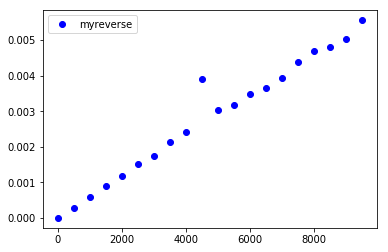

In [120]:
### GLEICHER Algorithmus über VERSCHIEDENEN konkreten Datentypen
    
##  Anwendung mit Stack: Invertieren einer Liste
#   Beispiel:  myreverse([1, 2, [3, 4], 5]) = [5, [3, 4], 2, 1]

# from stack import Stack1, Stack2, Stack3

import timeit
import random
import matplotlib.pyplot as plt

def myreverse(ls):
    s = Stack1()   # Datenstruktur hier ändern (EINZIGER Eingriff)  !!!!!!!!!!!!!!!!!!!!!
    result = []    # Liste
    for item in ls:
        s.push(item)
    while not(s.isEmpty()):
        result.append(s.pop())
    return result

##ls = [i for i in range(10)]
##print(ls)
##print(myreverse(ls))
        
## Effizienzanalyse

def analyze(fn, maxi=10000, step=500):
    '''Funktion zur Ermittlung der Laufzeiten T(n) in Abhängigkeit von der Problemgröße n'''
    tx = []
    ty = []
    global n  # Damit es im Timer verwendet werden kann
    for n in range(1, maxi, step):   # Wortlängen n  (Problemgröße)
        tt = []
        for i in range(10):   # Anzahl k der Instanzen für jedes n
            v = fn + '(ls)'
            t = timeit.Timer(v, 'gc.enable(); \
                from __main__ import ' + fn + ', myreverse, n; \
                ls = [i for i in range(n)]')  # wie eval
            tt = tt + [t.timeit(number=1)]
        tt.reverse()      # sort(), falls best case gesucht
        tx.append(n)
        ty.append(tt[0])  # ist das Maximum der Zeitenliste
    return tx, ty

plt.figure('Umkehr einer Listen')
result = analyze('myreverse')
plt.plot(result[0], result[1], 'bo', label='myreverse')
plt.legend(loc='upper left')
plt.show()

## Ergebnisse:

#  Alle drei in O(n), n ... Anzahl der Listenelemente
#     Ursache: Die Schleifen arbeiten mit O(n) und verschlingen den O(1)-Vorteil.

#  Da push() und pop() von Stack1 in O(1) ist der Anstieg der Geraden geringer.

#  Die Stack-Impl. 3 mit einfach verketteten Listen ist die ineffizienteste.

# --------------------------

### Alternative: Verwendung eines anderen Datentyps: (Python-) Liste

def myreverse(ls):
    ls.reverse()
    return ls

##plt.figure('Umkehr einer Listen')
##result = analyze('myreverse',30000)
##plt.plot(result[0], result[1], 'bo', label='myreverse')
##plt.legend(loc='upper left')
##plt.show()

## Ergebnis:

#  Liegt ebenfalls in O(n), n ... Anzahl der Listenelemente
#  Ist wesentlich schneller (Geradenanstieg geringer) als bei Wahl von Stack 1, 2, 3.

#  Die Python-Impl. verwendet ein ARRAY (aus C) und dimensioniert es so groß,
#  dass es für viele Anwendungen ausreicht. Falls es voll ist, wird ein neues
#  (wiederum over-allocated) ARRAY bereitgestellt und der Inhalt das alten
#  dorhin KOPIERT. ---> Amorisierte Effizienz ist sehr gut.
#  Deshalb gibt es in der Aufwandsgrafik immer wieder "Ausreißer".



## Queue

Ein ADT Queue (Warteschlange) ist dem Stack ähnlich. Hier gibt es ebenso die Operationen 

* zur Instanziierung einer Queue,
* zum Hinzufügen (enqueue) eines neuen Elements (am Ende: rear) und
* zum Entfernen (dequeue) des nächsten Elements (am Anfang: front).

Im Gegensatz zum Stack (LIFO) handelt es sich bei einer Queue um eine First-In-First-Out-(FIFO)-Datenstruktur. D.h. die Elemente, die zuerst mit der *enqueue*-Operation am Ende (rear, tail) der Queue hinzugefügt wurden, werden auch die sein, die zuerst mit der *dequeue*-Operation am Anfang (head) entfernt werden - so wie man das von einer Warteschlange erwartet.

Eine Queue kann mit einer Doubly Linked List implementiert. Da man bei einer Queue sehr häufig Elemente am Ende anfügt und am Anfang entfernt, ist eine flexible Listen-Datenstruktur, wie eben die Linked List, sehr zu empfehlen. Neben der Verwendung einer Doubly Linked List kann auch eine Singly Linked List, für die wir je einen Zeiger auf das aktuell erste bzw. letzte Element speichern, Verwendung finden. Einfügen und entfernen eines Elements können in konstanter Zeit, d.h. in $\mathcal{O}(1)$, erfolgen.

Nun ist es relativ einfach eine Queue mit Singly Linked List zu implementieren. Bei der *enqueue*-Operation muss man ein neues Node anlegen, dessen Pointer auf das bisher erste Element setzen und den *head* der Queue entsprechend anpassen. Bei der *dequeue*-Operation wird das letzte Element entfernt und der Pointer des vorherigen Nodes auf null gesetzt. Außerdem wird der *rear*-Pointer nun auf das bisher vorletzte und aktuell letzte Node gesetzt.

In [121]:
class Node: 
      
    def __init__(self, data): 
        self.data = data 
        self.next = None
 
class Queue: 
      
    def __init__(self): 
        self.front = self.rear = None
  
    def isEmpty(self): 
        return self.front == None
      
    # Method to add an item to the queue 
    def EnQueue(self, item): 
        temp = Node(item) 
          
        if self.rear == None: 
            self.front = self.rear = temp 
            return               # gibt False zurück
        self.rear.next = temp 
        self.rear = temp 
  
    # Method to remove an item from queue 
    def DeQueue(self): 
          
        if self.isEmpty(): 
            return
        temp = self.front 
        self.front = temp.next
  
        if(self.front == None): 
            self.rear = None
        return str(temp.data) 
  
# Driver Code 
if __name__== '__main__': 
    q = Queue() 
    q.EnQueue(10)
    q.EnQueue(20) 
    q.DeQueue() 
    q.DeQueue() 
    q.EnQueue(30) 
    q.EnQueue(40) 
    q.EnQueue(50) 
      
    print("Dequeued item is " + q.DeQueue()) 


Dequeued item is 30


Für die Queue können wir die Doubly-Linked List, die wir oben implementiert haben, nutzen.
Im Unterschied zu obiger Beschreibung der Operationen `enqueue` und `dequeue` werden neue Elemente vorn (front) hinzugefügt und hinten (rear) entfernt. Auf diese Weise wird nicht nur FIFO umgesetzt, sondern auch eine Bewegung der Warteschlange im Speicher bei vielen `enqueue`- und `dequeue`-Operationen vermieden. Man kann sich den Speicher dann auch zyklisch (Kreisstruktur) vorstellen.

In [122]:
class Queue:
    def __init__(self):
        self.lst = DoublyLinkedList()

    def enqueue(self, value):
        self.lst.add(value, 0)

    def dequeue(self):
        value = self.lst.tail.value
        self.lst.remove_from_tail(0)
        return value


queue = Queue()
queue.enqueue(4)
queue.enqueue(3)
queue.enqueue(-1)
print(queue.dequeue())
print(queue.dequeue())
print(queue.dequeue())

4
3
-1


## Fazit

Abschließend stellen wir die Aufwände der einzelnen Operationen übersichtlich zusammen. Derartige Angaben bilden die wichtigste Grundlage für die Interpretation und Entscheidung für oder gegen einen bestimmten Datentyp in entsprechenden Softwareprojekten.

<table>
  <thead>
    <tr>
      <th></th>
      <th>Access</th>
      <th>Search</th>
      <th>Insert</th>
      <th>Delete</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Array</td>
      <td>$\mathcal{O}(1)$</td>
      <td>$\mathcal{O}(n\log n)$</td>
      <td>$\mathcal{O}(n)$</td>
      <td>$\mathcal{O}(n)$</td>
    </tr>
    <tr>
      <td>Singly linked list</td>
      <td>$\mathcal{O}(n)$</td>
      <td>$\mathcal{O}(n)$</td>
      <td>$\mathcal{O}(1)$</td>
      <td>$\mathcal{O}(1)$</td>
    </tr>
    <tr>
      <td>Doubly linked list</td>
      <td>$\mathcal{O}(n)$</td>
      <td>$\mathcal{O}(n)$</td>
      <td>$\mathcal{O}(1)$</td>
      <td>$\mathcal{O}(1)$</td>
    </tr>
    <tr>
      <td>Dynamisches Array</td>
      <td>$\mathcal{O}(1)$</td>
      <td>$\mathcal{O}(n\log n)$</td>
      <td>$\mathcal{O}(1)$</td>
      <td>$\mathcal{O}(1)$</td>
    </tr>    
    <tr>
      <td>Stack</td>
      <td>$\mathcal{O}(n)$</td>
      <td>$\mathcal{O}(n)$</td>
      <td>$\mathcal{O}(1)$</td>
      <td>$\mathcal{O}(1)$</td>
    </tr>
    <tr>
      <td>Queue</td>
      <td>$\mathcal{O}(n)$</td>
      <td>$\mathcal{O}(n)$</td>
      <td>$\mathcal{O}(1)$</td>
      <td>$\mathcal{O}(1)$</td>
    </tr>    
  </tbody>
</table>

<!-- 
|                    | Access           | Search                         | Insert           | Delete           |
| :----------------- | :--------------- | :----------------------------- | :--------------- | :--------------- |
| Array              | $\mathcal{O}(1)$ | $\mathcal{O}(n\log n)$         | $\mathcal{O}(n)$ | $\mathcal{O}(n)$ |
| Singly-Linked List | $\mathcal{O}(n)$ | $\mathcal{O}(n)$               | $\mathcal{O}(1)$ | $\mathcal{O}(1)$ |
| Doubly-Linked List | $\mathcal{O}(n)$ | $\mathcal{O}(n)$               | $\mathcal{O}(1)$ | $\mathcal{O}(1)$ |
| Dynamisches Array  | $\mathcal{O}(1)$ | $\mathcal{O}(n\log n)$         | $\mathcal{O}(1)$ | $\mathcal{O}(1)$ |
| Stack              | $\mathcal{O}(n)$ | $\mathcal{O}(n)$               | $\mathcal{O}(1)$ | $\mathcal{O}(1)$ |
| Queue              | $\mathcal{O}(n)$ | $\mathcal{O}(n)$               | $\mathcal{O}(1)$ | $\mathcal{O}(1)$ |
-->
